In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq '/content/drive/MyDrive/Twitter Sentiment Analysis.zip'

In [135]:
import pandas as pd
df = pd.read_csv('tweets.csv', encoding="ISO-8859-1", names=['target','id','date','falg','user','tweet_text'])

In [136]:
twe_text = df[['target', 'tweet_text']]

In [ ]:
twe_text.target.unique()

array([0, 4])

In [146]:
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
twe_text

,target,tweet_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [129]:
twe_text.duplicated().sum()

16309

In [137]:
twe_text.drop_duplicates(subset=['target','tweet_text'], inplace=True) # 중복치 제거

<ipython-input-137-a32dd3e76f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text.drop_duplicates(subset=['target','tweet_text'], inplace=True) # 중복치 제거


In [ ]:
twe_text

,target,tweet_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
twe_text.target.value_counts()  # 긍정, 부정 자료는 균등함.

4    793506
0    790185
Name: target, dtype: int64

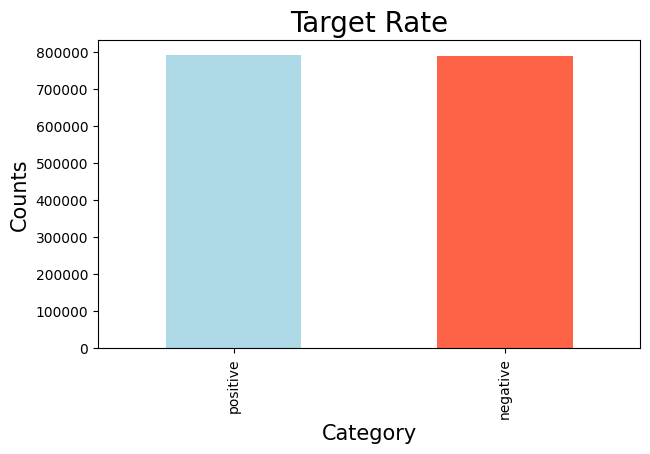

In [124]:
plt.figure(figsize=(7,4))

plt.title('Target Rate' , fontsize=20)

plt.ylabel('Counts' , fontsize=15)
plt.xlabel('Category' , fontsize=15)

twe_text['target'].value_counts().plot.bar(color = ['lightblue', 'tomato'])
plt.show()

In [138]:
twe_text['target'] = twe_text['target'] / 4

<ipython-input-138-e4641951cff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['target'] = twe_text['target'] / 4


In [139]:
twe_text['target'] = twe_text['target'].replace({0:'negative', 1:'positive'})

<ipython-input-139-1f19af474d61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['target'] = twe_text['target'].replace({0:'negative', 1:'positive'})


In [132]:
twe_text

,target,tweet_text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,positive,Just woke up. Having no school is the best fee...
1599996,positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,positive,Happy 38th Birthday to my boo of alll time!!! ...


In [140]:
twe_text.reset_index(inplace=True ,drop=True)

In [141]:
neg = twe_text[twe_text['target'] == 'negative']
pos = twe_text[twe_text['target'] == 'positive']

In [142]:
neg

,target,tweet_text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
790180,negative,Sick Spending my day laying in bed listening ...
790181,negative,Gmail is down?
790182,negative,rest in peace Farrah! So sad
790183,negative,@Eric_Urbane Sounds like a rival is flagging y...


In [143]:
pos

,target,tweet_text
790185,positive,I LOVE @Health4UandPets u guys r the best!!
790186,positive,im meeting up with one of my besties tonight! ...
790187,positive,"@DaRealSunisaKim Thanks for the Twitter add, S..."
790188,positive,Being sick can be really cheap when it hurts t...
790189,positive,@LovesBrooklyn2 he has that effect on everyone
...,...,...
1583686,positive,Just woke up. Having no school is the best fee...
1583687,positive,TheWDB.com - Very cool to hear old Walt interv...
1583688,positive,Are you ready for your MoJo Makeover? Ask me f...
1583689,positive,Happy 38th Birthday to my boo of alll time!!! ...


In [144]:
pos.reset_index(inplace=True ,drop=True)

In [ ]:
import re

subs_text1 = []
subs_text2 = []

for i in neg['tweet_text']:
  te = re.sub(r"[^a-zA-Z0-9 ]", '', i)
  subs_text1.append([te])

for i in pos['tweet_text']:
  te = re.sub(r"[^a-zA-Z0-9 ]", '', i)
  subs_text2.append([te])

In [147]:
import re

tokens = []

for doc in tokenizer.pipe(neg['tweet_text']):

  doc_tokens = [re.sub(r"[^a-z0-9]", '', token.text.lower()) for token in doc]
  doc_tokens = [tok for tok in doc_tokens if tok != '']
  tokens.append(doc_tokens)
neg['tokens'] = tokens

tokens = []

for doc in tokenizer.pipe(pos['tweet_text']):
  doc_tokens = [re.sub(r"[^a-z0-9]", '', token.text.lower()) for token in doc]
  doc_tokens = [tok for tok in doc_tokens if tok != '']
  tokens.append(doc_tokens)
pos['tokens'] = tokens

<ipython-input-147-ae68f897fad2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['tokens'] = tokens
<ipython-input-147-ae68f897fad2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['tokens'] = tokens


In [148]:
tokens = []

for doc in tokenizer.pipe(twe_text['tweet_text']):

  doc_tokens = [re.sub(r"[^a-z0-9]", '', token.text.lower()) for token in doc]
  doc_tokens = [tok for tok in doc_tokens if tok != '']
  tokens.append(doc_tokens)
twe_text['tokens'] = tokens


<ipython-input-148-2eda47724220>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['tokens'] = tokens


In [149]:
pos

,target,tweet_text,tokens
0,positive,I LOVE @Health4UandPets u guys r the best!!,"[i, love, health4uandpets, u, guys, r, the, best]"
1,positive,im meeting up with one of my besties tonight! ...,"[im, meeting, up, with, one, of, my, besties, ..."
2,positive,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thanks, for, the, twitter, a..."
3,positive,Being sick can be really cheap when it hurts t...,"[being, sick, can, be, really, cheap, when, it..."
4,positive,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn2, he, has, that, effect, on, ev..."
...,...,...,...
793501,positive,Just woke up. Having no school is the best fee...,"[just, woke, up, having, no, school, is, the, ..."
793502,positive,TheWDB.com - Very cool to hear old Walt interv...,"[thewdbcom, very, cool, to, hear, old, walt, i..."
793503,positive,Are you ready for your MoJo Makeover? Ask me f...,"[are, you, ready, for, your, mojo, makeover, a..."
793504,positive,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, 38th, birthday, to, my, boo, of, alll,..."


In [ ]:

STOP_WORDS = nlp.Defaults.stop_words.union()
     
tokens = []

for doc in pos['tokens']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
    
pos['tokens'] = tokens

<ipython-input-10-1bd8d33fc629>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['tokens'] = tokens


In [14]:

STOP_WORDS = nlp.Defaults.stop_words.union(['im', '-', 'today', 'got', 'day', 'u', 'time', 'going', 'know', 'thats', 'cant'])
     
tokens = []

for doc in pos['tokens']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
    
pos['tokens'] = tokens

<ipython-input-14-78a8ee42cbf7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['tokens'] = tokens


In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union()
     
tokens = []

for doc in pos['tokens']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
    
pos['tokens'] = tokens

<ipython-input-60-1bd8d33fc629>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['tokens'] = tokens


In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union(['im', '-', 'today', 'got', 'day', 'u', 'time', 'going', 'want', 'good', 'know'])
     
tokens = []

for doc in neg['tokens']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
    
neg['tokens'] = tokens

<ipython-input-37-11c5d9e3ed0b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['tokens'] = tokens


In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union(['im', '-', 'today', 'got', 'day', 'u', 'time', 'going', 'want', 'good', 'know'])
     
tokens = []

for doc in twe_text['tokens']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
    
twe_text['tokens'] = tokens

<ipython-input-30-4ddad15453e1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['tokens'] = tokens


In [ ]:
type(STOP_WORDS)

set

In [ ]:
doc

switchfoot httptwitpiccom2y1zl awww thats bummer shoulda david carr d

In [15]:
from collections import Counter

word_counts = Counter()
word_in_docs = Counter()

word_docs = neg['tokens'].apply(lambda x: word_counts.update(x))
word_in_docs = neg['tokens'].apply(lambda x: word_in_docs.update(set(x)))

print(word_counts.most_common(10))

[('i', 459223), ('to', 310887), ('the', 255380), ('my', 187395), ('a', 179571), ('and', 150718), ('is', 126783), ('it', 118622), ('in', 113957), ('im', 102594)]


In [ ]:
word_in_docs = Counter()

for doc in neg['tokens']:
  word_in_docs.update(set(doc))

In [16]:
word_pos_docs = pos['tokens'].apply(lambda x: word_counts.update(x))

word_in_pos_docs = Counter()

for doc in pos['tokens']:
  word_in_pos_docs.update(set(doc))

In [ ]:
word_tex_docs = twe_text['tokens'].apply(lambda x: word_counts.update(x))

word_in_tex_docs = Counter()

for doc in twe_text['tokens']:
  word_in_tex_docs.update(set(doc))

In [ ]:
print(word_in_docs.most_common(10))

AttributeError: ignored

In [ ]:
wd_count = pd.DataFrame(word_in_docs.most_common(), columns = ['word','word_in_docs'])
wd_count

AttributeError: ignored

In [17]:
wd_pos_count = pd.DataFrame(word_in_pos_docs.most_common(), columns = ['word','word_in_docs'])
wd_pos_count

,word,word_in_docs
0,good,57123
1,love,44207
2,like,35535
3,thanks,33303
4,lol,31947
...,...,...
547142,cliffforster,1
547143,thewdbcom,1
547144,httpblipfm8bmta,1
547145,sparkscharity,1


In [18]:
wd_pos_count['word_in_docs_percent'] = wd_pos_count['word_in_docs'].apply(lambda x: x / len(pos['tokens']))

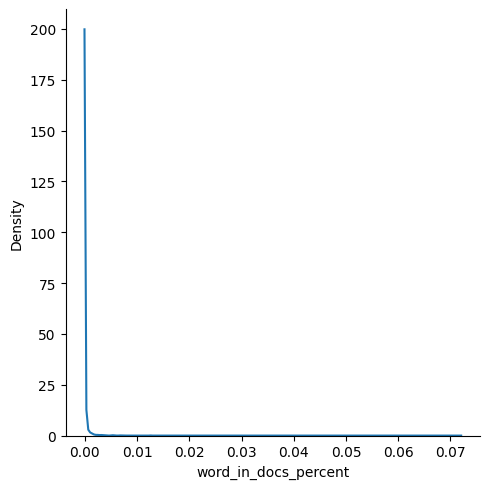

In [19]:
import seaborn as sns

sns.displot(wd_pos_count['word_in_docs_percent'], kind='kde');

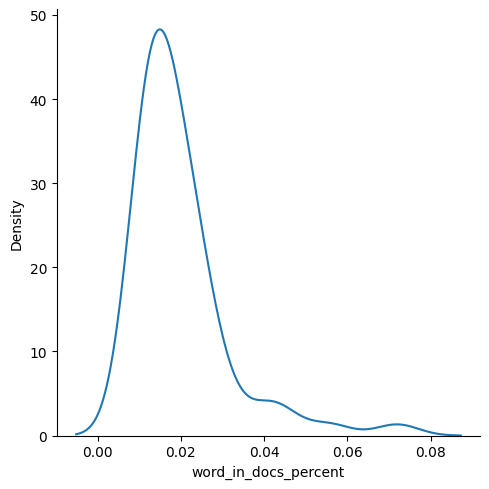

In [150]:
wd_pos = wd_pos_count[wd_pos_count['word_in_docs_percent'] >= 0.01]
sns.displot(wd_pos['word_in_docs_percent'], kind='kde');

In [71]:
wd_pos

,word,word_in_docs,word_in_docs_percent
0,good,57123,0.071988
1,love,44207,0.055711
2,like,35535,0.044782
3,thanks,33303,0.041969
4,lol,31947,0.040261
5,new,25412,0.032025
6,great,23952,0.030185
7,dont,21412,0.026984
8,night,20734,0.026130
9,haha,20059,0.025279


In [72]:
pos = pos.reset_index(drop=True)

In [73]:
twe_text['tokens'].reset_index(inplace=True ,drop=True)

In [74]:
word_inv = []

for i in range(len(twe_text)):
  docc = []
  dif1 = list(set(twe_text['tokens'][i]) - set(wd_pos['word'])) # 파일 twe_text에는 포함되고 파일 wd_pos에는 포함되지 않은 맴버 출력
  dif2 = list(set(wd_pos['word']) - set(twe_text['tokens'][i])) # 파일 wd_pos번에는 포함되고 파일 twe_text에는 포함되지 않은 맴버 출력
  if len((set(wd_pos['word'])-set(dif1))-set(dif2)) > 3:        # 두 파일중 공통된 요소 출력 
    docc.append('Yes')
  else:
    docc.append('No')
    
  word_inv.append(docc)

In [75]:
twe_text['word_involve']= word_inv

<ipython-input-75-04dafa699eb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['word_involve']= word_inv


In [ ]:
twe_text

,target,tweet_text,tokens,word_involve
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, httptwitpiccom2y1zl, awww, thats,...",[No]
1,negative,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, faceb...",[No]
2,negative,@Kenichan I dived many times for the ball. Man...,"[kenichan, i, dived, many, times, for, the, ba...",[No]
3,negative,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",[Yes]
4,negative,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ...",[No]
...,...,...,...,...
1583686,positive,Just woke up. Having no school is the best fee...,"[just, woke, up, having, no, school, is, the, ...",[Yes]
1583687,positive,TheWDB.com - Very cool to hear old Walt interv...,"[thewdbcom, very, cool, to, hear, old, walt, i...",[Yes]
1583688,positive,Are you ready for your MoJo Makeover? Ask me f...,"[are, you, ready, for, your, mojo, makeover, a...",[No]
1583689,positive,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, 38th, birthday, to, my, boo, of, alll,...",[Yes]


In [76]:
twe_text['word_involve'] = twe_text['word_involve'].astype('str')

<ipython-input-76-a5f58944f2b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['word_involve'] = twe_text['word_involve'].astype('str')


In [77]:
twe_text['word_involve'] = twe_text['word_involve'].str.replace(pat=r'[', repl=r'', regex=True)
twe_text['word_involve'] = twe_text['word_involve'].str.replace(pat=r']', repl=r'', regex=True)
twe_text

<ipython-input-77-0ee193a53fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['word_involve'] = twe_text['word_involve'].str.replace(pat=r'[', repl=r'', regex=True)
<ipython-input-77-0ee193a53fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['word_involve'] = twe_text['word_involve'].str.replace(pat=r']', repl=r'', regex=True)


,target,tweet_text,tokens,word_involve
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, httptwitpiccom2y1zl, awww, thats,...",'No'
1,negative,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, faceb...",'No'
2,negative,@Kenichan I dived many times for the ball. Man...,"[kenichan, i, dived, many, times, for, the, ba...",'No'
3,negative,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",'No'
4,negative,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ...",'No'
...,...,...,...,...
1583686,positive,Just woke up. Having no school is the best fee...,"[just, woke, up, having, no, school, is, the, ...",'No'
1583687,positive,TheWDB.com - Very cool to hear old Walt interv...,"[thewdbcom, very, cool, to, hear, old, walt, i...",'No'
1583688,positive,Are you ready for your MoJo Makeover? Ask me f...,"[are, you, ready, for, your, mojo, makeover, a...",'No'
1583689,positive,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, 38th, birthday, to, my, boo, of, alll,...",'No'


In [78]:
twe_text['word_involve'] = twe_text['word_involve'].replace({"'Yes'":1, "'No'":0})
twe_text

<ipython-input-78-a00f64f0dbcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twe_text['word_involve'] = twe_text['word_involve'].replace({"'Yes'":1, "'No'":0})


,target,tweet_text,tokens,word_involve
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, httptwitpiccom2y1zl, awww, thats,...",0
1,negative,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, faceb...",0
2,negative,@Kenichan I dived many times for the ball. Man...,"[kenichan, i, dived, many, times, for, the, ba...",0
3,negative,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",0
4,negative,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ...",0
...,...,...,...,...
1583686,positive,Just woke up. Having no school is the best fee...,"[just, woke, up, having, no, school, is, the, ...",0
1583687,positive,TheWDB.com - Very cool to hear old Walt interv...,"[thewdbcom, very, cool, to, hear, old, walt, i...",0
1583688,positive,Are you ready for your MoJo Makeover? Ask me f...,"[are, you, ready, for, your, mojo, makeover, a...",0
1583689,positive,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, 38th, birthday, to, my, boo, of, alll,...",0


In [79]:
ctr_pop = twe_text.word_involve.mean()

In [80]:
ctr_pop

0.016808834551689692

In [81]:
n_neg = twe_text.query('target == "negative"').shape[0]
n_pos = twe_text.query('target == "positive"').shape[0]

In [82]:
ctr_neg = twe_text.query('target == "negative"').word_involve.mean()
ctr_pos = twe_text.query('target == "positive"').word_involve.mean()
ctr_diff = ctr_pos - ctr_neg

In [51]:
ctr_neg

0.09502205179799667

In [83]:
p_diffs = []

for _ in range(1000):
    neg_text = np.random.choice([0,1], n_neg, p = [1-ctr_pop, ctr_pop], replace=True)
    pos_text = np.random.choice([0,1], n_pos, p = [1-ctr_pop, ctr_pop], replace=True)
    p_diffs.append(pos_text.mean() - neg_text.mean())

p_diffs = np.array(p_diffs)

In [84]:
[1-ctr_pop, ctr_pop]

[0.9831911654483103, 0.016808834551689692]

In [86]:
(p_diffs > ctr_diff).mean()

0.0

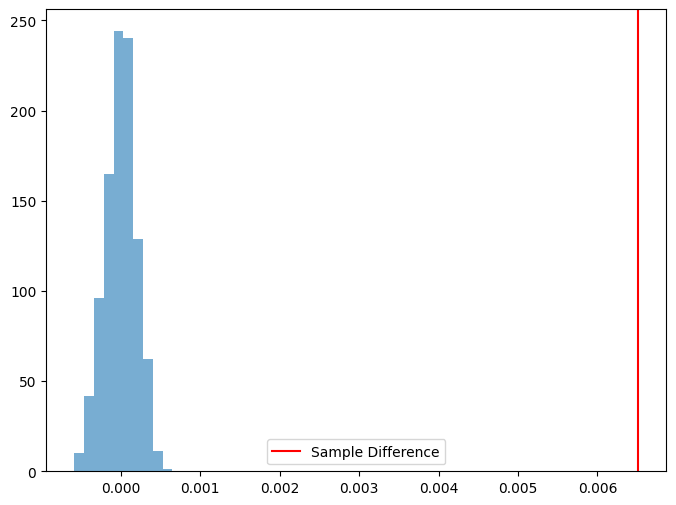

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(p_diffs, alpha=0.6)
plt.axvline(ctr_diff, color='r', label='Sample Difference')
plt.legend();

In [85]:
import statsmodels.api as sm

twe_neg = twe_text.query('target == "negative"').word_involve.sum()
twe_pos = twe_text.query('target == "positive"').word_involve.sum()

sm.stats.proportions_ztest([twe_neg, twe_pos], [n_neg, n_pos], alternative='smaller')

(-31.85938196074809, 4.879843019173184e-223)

In [47]:
twe_neg

75085

In [ ]:
import numpy as np
i = np.arange(5)[np.newaxis, :]

In [ ]:
d_model=5
angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))

In [ ]:
angle_rates

array([[1.00000000e+00, 1.00000000e+00, 2.51188643e-02, 2.51188643e-02,
        6.30957344e-04]])

In [91]:
text_df = df[['target', 'tweet_text']]
text_df.drop_duplicates(subset=['target','tweet_text'], inplace=True)
text_df.reset_index(drop=True, inplace=True)
text_df['target'] = text_df['target'] / 4

<ipython-input-91-c5286ed3f7ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.drop_duplicates(subset=['target','tweet_text'], inplace=True)
<ipython-input-91-c5286ed3f7ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['target'] = text_df['target'] / 4


In [92]:
random_text = text_df.sample(n=100000, random_state=42)
random_text['target'].value_counts()

1.0    50102
0.0    49898
Name: target, dtype: int64

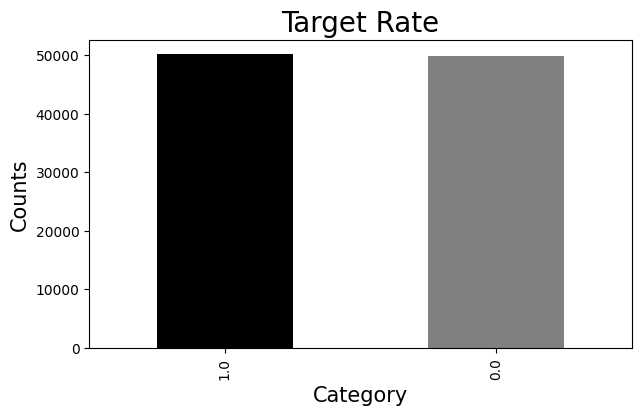

In [152]:
plt.figure(figsize=(7,4))

plt.title('Target Rate' , fontsize=20)

plt.ylabel('Counts' , fontsize=15)
plt.xlabel('Category' , fontsize=15)

random_text['target'].value_counts().plot.bar(color = ['black', 'grey'])
plt.show()

In [89]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(42)
tf.random.set_seed(42)

In [93]:
encoder = LabelEncoder()
labels = encoder.fit_transform(random_text['target'])

x_train, x_test, y_train, y_test = train_test_split(random_text['tweet_text'], labels, test_size=0.15, random_state=42)

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1   # 단어 집합(vocab)의 크기
x_encoded = tokenizer.texts_to_sequences(x_train)

maxlen_pad = 300

X_train=pad_sequences(x_encoded, maxlen=maxlen_pad, padding='post')
y_train=np.array(y_train)
y_train = y_train.reshape(-1, 1)

X_test_encoded = tokenizer.texts_to_sequences(x_test)

X_test=pad_sequences(X_test_encoded, maxlen=300, padding='post')
y_test=np.array(y_test)

In [94]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [95]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        
    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [96]:
embed_dim = 256  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
maxlen = 300

inputs = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [153]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 token_and_position_embeddin  (None, 300, 256)         22725888  
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 300, 256)         1069600   
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               32896 

In [102]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
model_history = model.fit(
    X_train, y_train, batch_size=128, epochs=5, validation_split=0.2
)

Epoch 1/5
532/532 [==============================] - 113s 205ms/step - loss: 0.4579 - accuracy: 0.7773 - precision: 0.7811 - recall: 0.7694 - val_loss: 0.5014 - val_accuracy: 0.7591 - val_precision: 0.7861 - val_recall: 0.7215
Epoch 2/5
532/532 [==============================] - 112s 211ms/step - loss: 0.4551 - accuracy: 0.7784 - precision: 0.7817 - recall: 0.7715 - val_loss: 0.4964 - val_accuracy: 0.7616 - val_precision: 0.7474 - val_recall: 0.8008
Epoch 3/5
532/532 [==============================] - 113s 213ms/step - loss: 0.4520 - accuracy: 0.7801 - precision: 0.7826 - recall: 0.7745 - val_loss: 0.4976 - val_accuracy: 0.7620 - val_precision: 0.7549 - val_recall: 0.7861
Epoch 4/5
532/532 [==============================] - 113s 213ms/step - loss: 0.4477 - accuracy: 0.7832 - precision: 0.7861 - recall: 0.7773 - val_loss: 0.5011 - val_accuracy: 0.7576 - val_precision: 0.7835 - val_recall: 0.7217
Epoch 5/5
532/532 [==============================] - 113s 212ms/step - loss: 0.4439 - accura

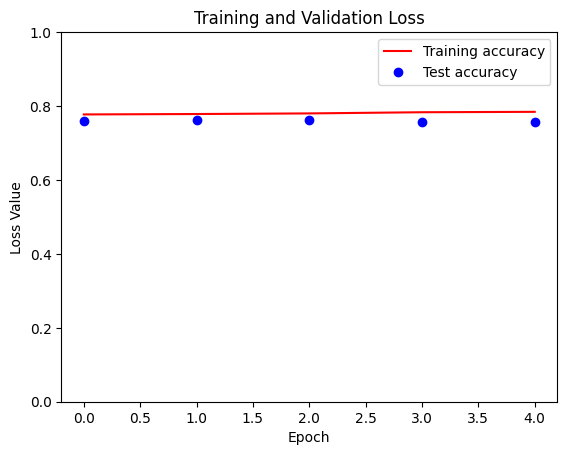

In [154]:
loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']

epochs = range(5)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'bo', label='Test accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()
     

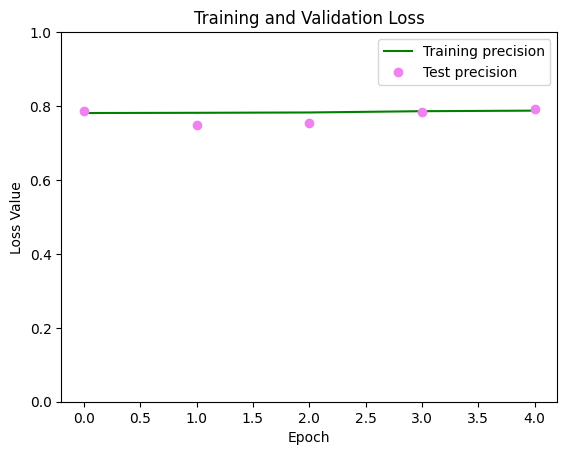

In [120]:
loss = model_history.history['precision']
val_loss = model_history.history['val_precision']

epochs = range(5)

plt.figure()
plt.plot(epochs, loss, 'g', label='Training precision')
plt.plot(epochs, val_loss, 'violet', marker='o',linestyle='', label='Test precision')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

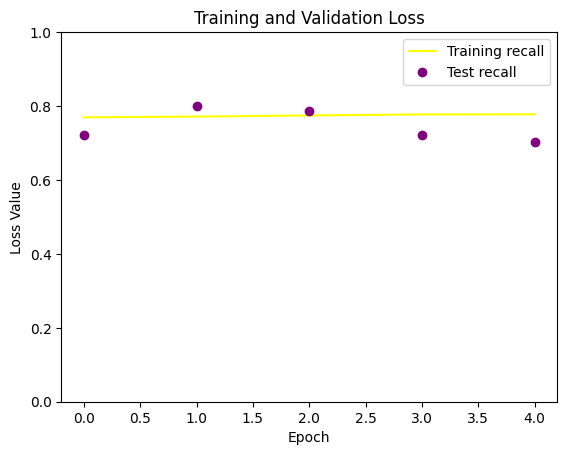

In [121]:
loss = model_history.history['recall']
val_loss = model_history.history['val_recall']

epochs = range(5)

plt.figure()
plt.plot(epochs, loss, 'yellow', label='Training recall')
plt.plot(epochs, val_loss, 'purple', marker='o',linestyle='', label='Test recall')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [156]:
precision = model.evaluate(X_test, y_test, verbose=2)[2]
recall = model.evaluate(X_test, y_test, verbose=2)[3]

469/469 - 8s - loss: 0.5165 - accuracy: 0.7555 - precision: 0.7865 - recall: 0.7043 - 8s/epoch - 17ms/step
469/469 - 8s - loss: 0.5165 - accuracy: 0.7555 - precision: 0.7865 - recall: 0.7043 - 8s/epoch - 18ms/step


In [104]:
_f1score = ( 2 * recall * precision) / (recall + precision)
_f1score

0.7431212129033732